# 乱数生成

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

## モンテカルロ法

In [2]:
in_pi = 0

#実行回数
n = 27000

for i in range(n):
    x = random.uniform(0,1)
    y = random.uniform(0,1)

    z = x**2+y**2

    if z <= 1:
        in_pi += 1

pi_by_monte = in_pi / n * 4
print(pi_by_monte)

3.141925925925926


## 逆関数法

一様分布から好きな確率分布に従う乱数を生成する方法のこと。

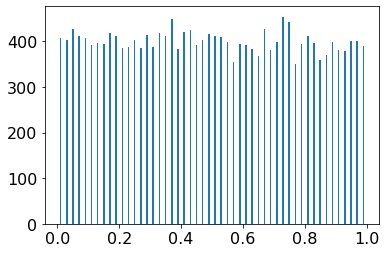

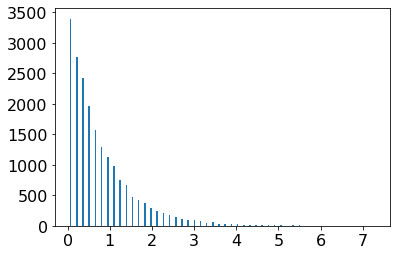

In [3]:
#指数分布から乱数を生成する
N = 20000
Nbin = 50
mu = 0.8
fs = 16

#一様乱数生成
u = np.random.rand(N)

#ヒストグラム表示
plt.hist(u, bins=Nbin, rwidth=0.25)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.show()

#逆関数法の適用
v = -mu*np.log(1.0-u) #一様乱数に指数分布の逆関数を適用
plt.hist(v, bins=Nbin, rwidth=0.25)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.show()

## 採択棄却法

解析的に乱数を生成できないような、複雑な確率分布から乱数を生成する方法の一つ\
条件としては、確率密度関数を求められること

- 乱数を用意に生成できるようなシンプルな分布でかつ、目標分布の全体をすっぽり覆うような分布を選ぶ。（提案分布）
- 提案分布から乱数を発生させる。
- 得られた提案分布の乱数が、目標分布の内側に入っていれば、目標分布の乱数として受け入れる。
- 得られた提案分布の乱数が、目標分布の内側に入っていなければ、目標分布の乱数としては受け入れず、捨てる。
- 結果として、目標分布の確率に応じて乱数が受け入れられる。確率が高いところは受け入れられる事が多いが、確率が低いところは捨てられることが多い。これにより、狙い通りに目標分布と整合的な乱数のヒストグラムが出来上がる。

In [4]:
from scipy import stats

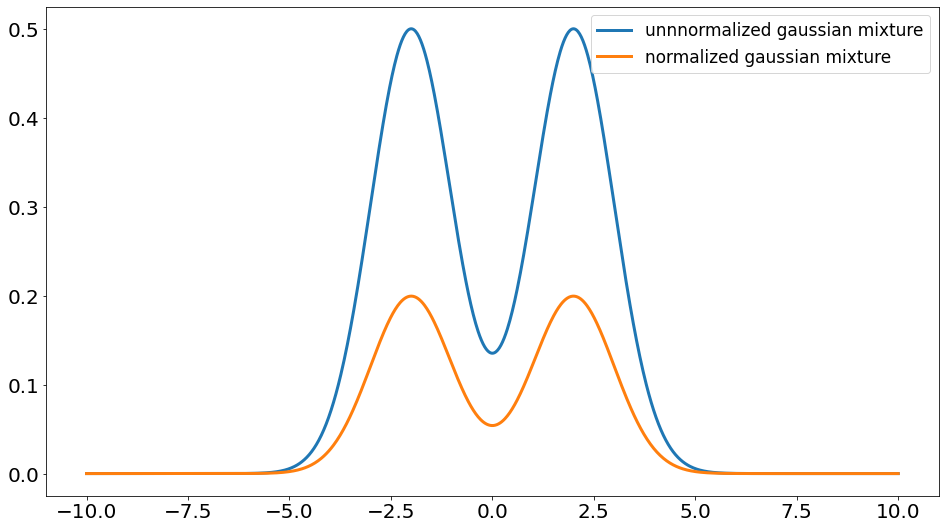

In [9]:
#混合ガウス分布に従う乱数を生成してみる
def mixed_gauss_target(x, mu1=2.0, mu2=-2.0, scale1=1.0, scale2=1.0, pi=0.5):
    pi1 = pi
    pi2 = 1-pi1
    return pi1 * stats.norm.pdf(x, loc=mu1, scale=scale1) + pi2*stats.norm.pdf(x, loc=mu2, scale=scale2)

def mixed_gauss(x, mu1=2.0, mu2=-2.0, scale1=1.0, scale2=1.0, pi=0.5):
    pi1 = pi
    pi2 = 1-pi1
    a1 = -((x-mu1)**(2)) / (2*scale1**(2))
    a2 = -((x-mu2)**(2)) / (2*scale2**(2))
    return pi1*np.exp(a1)+pi2*np.exp(a2)

x = np.linspace(-10, 10, 1000)
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(x, mixed_gauss(x), linewidth=3, label='unnnormalized gaussian mixture')
ax.plot(x, mixed_gauss_target(x), linewidth=3, label='normalized gaussian mixture')
plt.legend(fontsize=17)
plt.tick_params(axis='y', labelsize=20)
plt.tick_params(axis='x', labelsize=20)
plt.show()


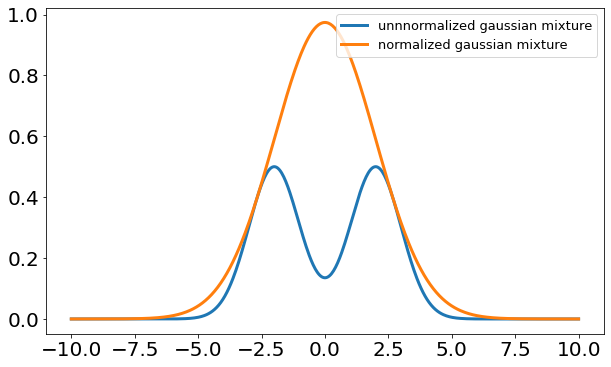

In [10]:
#提案分布を設定
def q(x, loc=0, scale=1):
    return stats.norm.pdf(x, loc=loc, scale=scale)

x = np.linspace(-10, 10, 500)

#最適なkを計算
k_opt = np.max(mixed_gauss(x) / q(x, scale=2))

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(x, mixed_gauss(x), linewidth=3, label='unnnormalized gaussian mixture')
ax.plot(x, k_opt*q(x, scale=2), linewidth=3, label='normalized gaussian mixture')
plt.legend(fontsize=13)
plt.tick_params(axis='y', labelsize=20)
plt.tick_params(axis='x', labelsize=20)
plt.show()

In [11]:
#棄却サンプリングを実装する
def rejection_sampling(times=100, k=k_opt):
    '''Rejection Sampling
    
    Parameters
    times : 使用するサンプル数
    k : Rejection Samplingの条件を満たすようなk

    Return
    samples : acceptされたサンプル

    '''
    samples = []
    accepted_num = 0

    for i in range(times):
        x = np.random.normal(0, 2.0)
        u = np.random.uniform(0, k*q(x,scale=2))

        if u <= mixed_gauss(x):
            samples.append(x)
            accepted_num += 1
        
    print(f'ACCEPTANCE RATE : {accepted_num/times}')
    return samples, accepted_num/times

ACCEPTANCE RATE : 0.5107


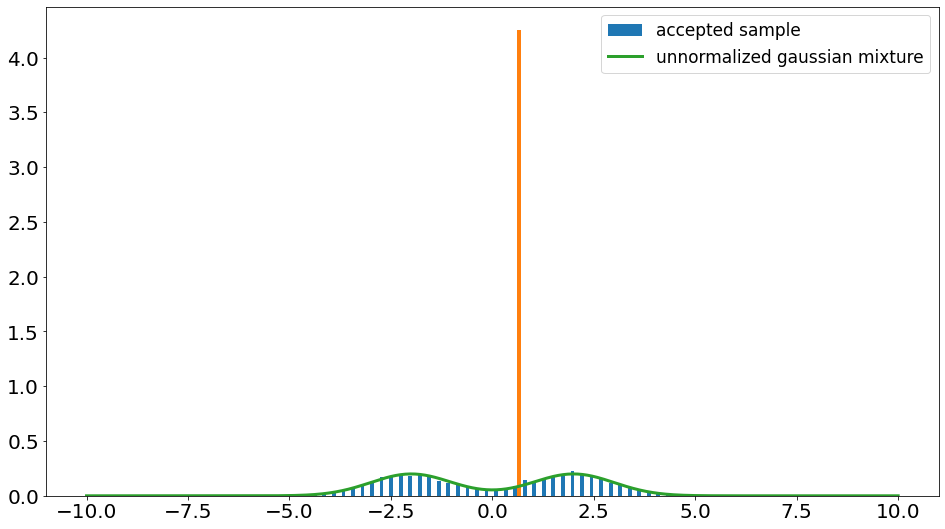

In [14]:
#結果と可視化
samples = rejection_sampling(times=10000)
fig, ax = plt.subplots(figsize=(16,9))
ax.hist(samples, bins=50, density=True, label='accepted sample')
ax.plot(x, mixed_gauss_target(x), linewidth=3, label='unnormalized gaussian mixture')
plt.legend(fontsize=17)
plt.tick_params(axis='y', labelsize=20)
plt.tick_params(axis='x', labelsize=20)
plt.show()

NameError: name 'ks' is not defined

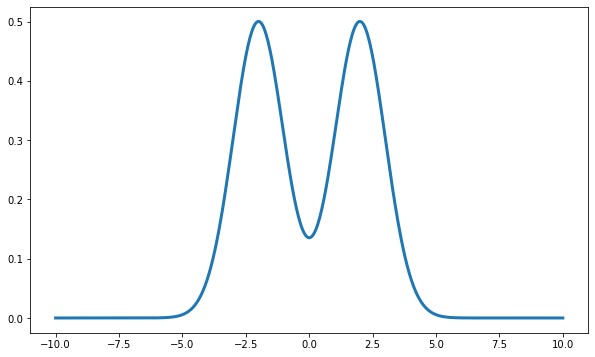

In [15]:
x = np.linspace(-10,10,500)
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(x, mixed_gauss(x), linewidth=3, label='target')
for k in ks:
    ax.plot(x, k*q(x, scale=2), linewidth=3, label=f'k = {k:.1f}')
plt.legend(fontsize=13)
plt.tick_params(axis='y', labelsize=20)
plt.tick_params(axis='x', labelsize=20)
plt.show()